<a href="https://colab.research.google.com/github/nmluthfi/TSP_with_SA_and_PSO/blob/Simple-Particle-Swarm/Tugas_Pemodelan_dan_Simulasi_TSP_dengan_Swarm_Particle_Optimization_1301218676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Swarm Particle Optimization algorithm
*   Nama: Nur Muhammad Luthfi
*   NIM: 1301218676



Best Cost = 23.7516326390234
Best Path:  ['0', '1', '2', '3', '4', '0']


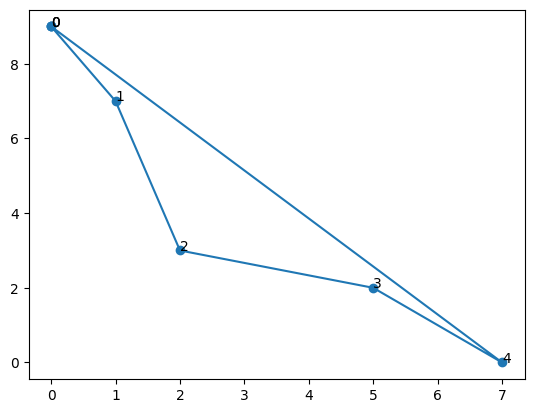

In [ ]:
import random
import math

def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def evaluate_path(path, distances):
    """
    Calculate the total distance of a given path.
    The path must start and end at the same city.
    """
    total_distance = 0
    for i in range(len(path)-1):
        total_distance += distances[int(path[i])][int(path[i+1])]
    total_distance += distances[int(path[-1])][int(path[0])]  # add distance from last city back to origin city
    return total_distance

def init_population(num_particles, num_cities):
    population = []
    for i in range(num_particles):
        path = random.sample(range(num_cities), num_cities)
        population.append(path)
    positions = [list(set(path)) for path in population]
    return positions

def simple_pso(num_particles, num_iterations, c1, c2, distances):
    positions = init_population(num_particles, len(distances))
    velocities = [[0] * len(distances) for i in range(num_particles)]
    p_best = positions.copy()
    g_best = min(positions, key=lambda x: evaluate_path(x, distances))
    g_best_cost = evaluate_path(g_best, distances)
    for iteration in range(num_iterations):
        for i in range(num_particles):
            r1 = random.random()
            r2 = random.random()
            velocity = velocities[i]
            position = positions[i]
            p_best_particle = p_best[i]
            for j in range(len(position)):
                velocity_j = velocity[j]
                position_j = position[j]
                p_best_j = p_best_particle[j]
                g_best_j = g_best[j]
                velocity_j = velocity_j + c1*r1*(p_best_j-position_j) + c2*r2*(g_best_j-position_j)
                position_j = position_j + velocity_j
                velocity[j] = velocity_j
                position[j] = position_j
            cost = evaluate_path(position, distances)
            if cost < evaluate_path(p_best_particle, distances):
                p_best[i] = position.copy()
                p_best_particle = position
            if cost < g_best_cost:
                g_best = position.copy()
                g_best_cost = cost
    return g_best, g_best_cost

def nodes_to_cities(nodes, cities):
    city_names = list(cities.keys())
    city_names.sort()
    node_map = dict(zip(range(len(city_names)), city_names))
    return [node_map[node] for node in nodes]

if __name__ == '__main__':
    cities = {
    '0': (0, 9),
    '1': (1, 7),
    '2': (2, 3),
    '3': (5, 2),
    '4': (7, 0)
    }
    distances = [[distance(cities[i], cities[j]) for j in cities] for i in cities]
    num_particles = 50
    num_iterations = 100
    c1 = 2
    c2 = 2
    best_path, best_cost = simple_pso(num_particles, num_iterations, c1, c2, distances)
    print(f'Best Cost = {best_cost}') 

    best_path.append(best_path[0])
    best_path_nodes = [int(node) for node in best_path]
    best_path_cities = nodes_to_cities(best_path_nodes, cities)
    print("Best Path: ", best_path_cities)

import matplotlib.pyplot as plt

def visualize(cities, path):
    path.append(path[0]) # add the starting city at the end of the path to complete the loop
    x = [cities[city][0] for city in path]
    y = [cities[city][1] for city in path]
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o-')
    for i, city in enumerate(path):
        ax.annotate(city, (x[i], y[i]))
    plt.show()

# add this at the end of the code to visualize the best path
visualize(cities, best_path_cities)